In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
path='https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv'

In [22]:
df=pd.read_csv(path)

In [23]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
df.isna().any()


Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [25]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [26]:
conditions = [
    (df['Sales'] >= 15),
    (df['Sales'] >=5 ) & (df['Sales'] < 15),
    (df['Sales'] < 5) 
    ]

# create a list of the values we want to assign for each condition
values = ['High', 'Medium', 'Low']

# create a new column and use np.select to assign values to it using our lists as arguments
df['SaleType'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,SaleType
0,1,230.1,37.8,69.2,22.1,High
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,High
4,5,180.8,10.8,58.4,12.9,Medium


In [27]:
df.groupby('SaleType').agg({'TV': ['mean', 'min', 'max'],'Radio': ['mean', 'min', 'max'],'Newspaper': ['mean', 'min', 'max']})

TV                   Radio              Newspaper            
                mean   min    max       mean   min   max       mean  min    max
SaleType                                                                       
High      213.893506  93.9  296.4  33.689610  10.6  49.6  35.332468  0.3  100.9
Low         4.466667   0.7    8.6  17.766667   2.1  39.6   5.133333  1.0    8.7
Medium    107.710833   5.4  290.7  16.711667   0.0  49.4  28.123333  0.9  114.0

In [28]:
df_stacked = df.stack()
df_stacked

0    Unnamed: 0         1
     TV             230.1
     Radio           37.8
     Newspaper       69.2
     Sales           22.1
                    ...  
199  TV             232.1
     Radio            8.6
     Newspaper        8.7
     Sales           13.4
     SaleType      Medium
Length: 1200, dtype: object

In [29]:
df.head().pivot(index ='TV', columns ='Sales', values =['SaleType'])

SaleType                            
Sales     9.3     10.4    12.9  18.5  22.1
TV                                        
17.2    Medium     NaN     NaN   NaN   NaN
44.5       NaN  Medium     NaN   NaN   NaN
151.5      NaN     NaN     NaN  High   NaN
180.8      NaN     NaN  Medium   NaN   NaN
230.1      NaN     NaN     NaN   NaN  High

In [30]:
for i in range(0,len(df)):
  if(i*5<len(df)):
    df.at[i*5, 'TV'] = np.nan
  if(i*9<len(df)):
    df.at[i*9, 'Newspaper'] = np.nan

In [31]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales,SaleType
0,1,NaN,37.8,NaN,22.1,High
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,High
4,5,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...,...
195,196,NaN,3.7,13.8,7.6,Medium
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium
198,199,283.6,42.0,NaN,25.5,High


In [32]:

df.dropna()

,Unnamed: 0,TV,Radio,Newspaper,Sales,SaleType
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,High
4,5,180.8,10.8,58.4,12.9,Medium
6,7,57.5,32.8,23.5,11.8,Medium
...,...,...,...,...,...,...
193,194,166.8,42.0,3.6,19.6,High
194,195,149.7,35.6,6.0,17.3,High
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium


In [33]:
df["TV"].fillna(0, inplace = True)

In [34]:
df["Newspaper"].fillna(df['Newspaper'].mean(), inplace = True)

In [35]:
from sklearn.preprocessing import StandardScaler

In [40]:

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
Linereg=LinearRegression()
Linereg.fit(X_train,y_train)

train_sizes, train_scores, validation_scores=learning_curve( estimator=LinearRegression() , X=X_train , y=y_train)
test_sizes, test_scores, validation_scores=learning_curve( estimator=LinearRegression() , X=X_test , y=y_test)

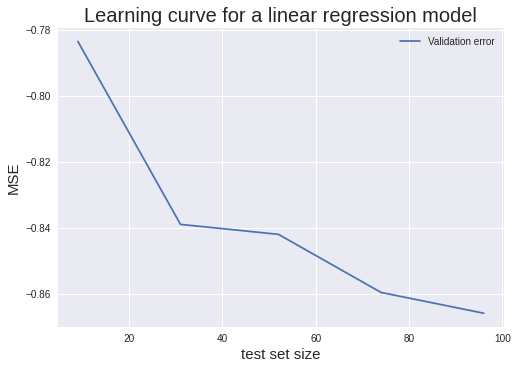

In [66]:
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 15)
plt.xlabel('test set size', fontsize = 15)
plt.title('Learning curve for a linear regression model', fontsize = 20)
plt.legend()

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9100246348518681

In [70]:
Linereg.score(X_train,y_train)

0.887278341418878

In [71]:
(Linereg.intercept_,Linereg.coef_)

(13.971218499377724, array([ 4.04703579,  2.79198889, -0.03267977]))

In [78]:
mean_squared_error(y_train,Linereg.predict(X_))

ValueError: ignored